In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df=pd.read_csv(r'C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Titanic\train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

# Categorical Features

In [5]:
cat_features=df.select_dtypes(include=['object']).columns
cat_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

# Numerical Features 

In [6]:
int_features=df.select_dtypes(include=['int']).columns
int_features

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')

# Float Features

In [7]:
Float_features=df.select_dtypes(include=['float']).columns
Float_features

Index(['Age', 'Fare'], dtype='object')

# Check Null Value

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [130]:
Null=df.columns[df.isnull().sum()>1]
Null

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [10]:
columns_to_drop = ["Ticket", "Cabin", "Name", "PassengerId"]

for i in columns_to_drop:
    if i in df.columns:
        df = df.drop(columns_to_drop, axis=1)

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

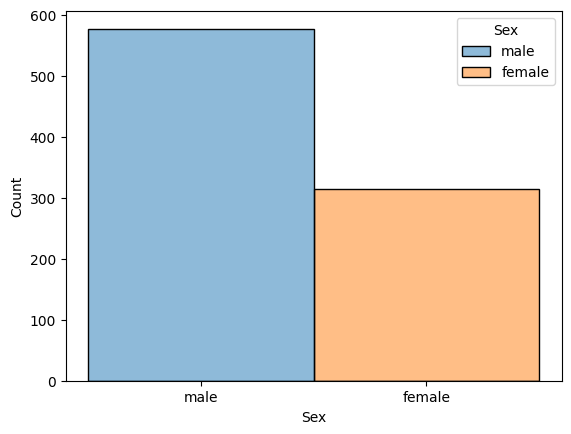

In [13]:
sns.histplot(df,x='Sex',color='r',hue='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

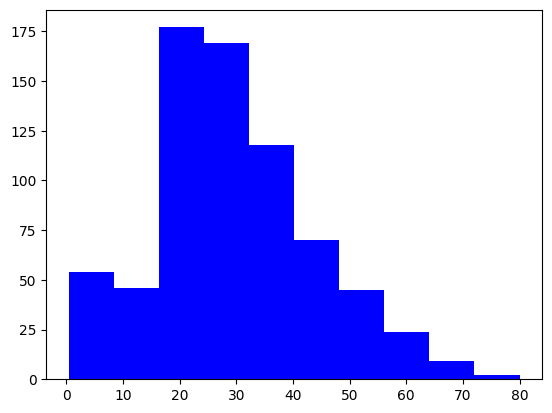

In [14]:
plt.hist(data=df,x='Age',color='b')

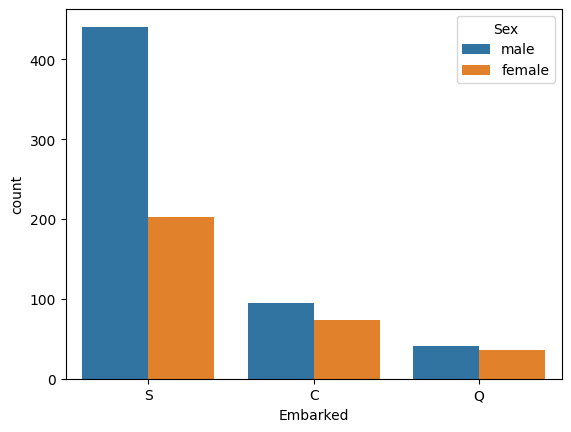

In [15]:
sns.countplot(df,x='Embarked',hue='Sex')
plt.show()


# Fill Na Values

In [16]:
median_age = df['Age'].median()
median_age

28.0

In [17]:
df['Age'].fillna(median_age,inplace=True)


In [18]:
mode_Embarked=df['Embarked'].mode()[0]
mode_Embarked

'S'

In [19]:
df['Embarked'].fillna(mode_Embarked,inplace=True)

In [20]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Encoding Method

In [22]:
# Custom encoding for Sex features
df['Sex_encd']=df['Sex'].map({'male':0,'female':1})

In [23]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
df['Embarked_encd']=df['Embarked'].map({'S':0,'C':1,'Q':2})

# Drop Categorical Features

In [25]:
drop_columns = ['Sex', 'Embarked']

# Drop the specified columns from the DataFrame
df = df.drop(columns=drop_columns)


In [26]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encd,Embarked_encd
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,28.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [27]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encd',
       'Embarked_encd'],
      dtype='object')

In [28]:
df['Age']=df['Age'].astype(int)


In [29]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encd', 'Embarked_encd']]
Y = df['Survived']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Model Selection

In [115]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
DC_model = DecisionTreeClassifier(random_state=42,max_leaf_nodes=550,max_depth=1000,max_features=50)
RC_model = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)

In [116]:
DC_model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=1000, max_features=50, max_leaf_nodes=550,
                       random_state=42)

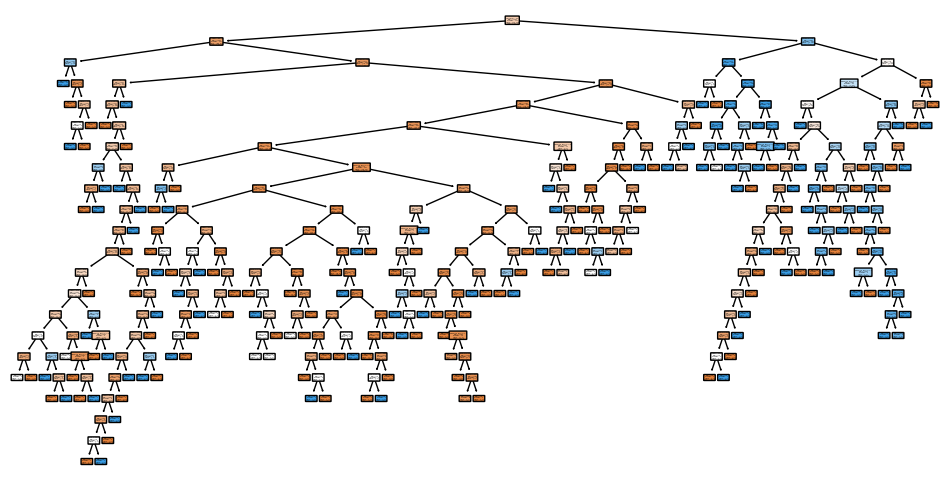

In [117]:
plt.figure(figsize=(12, 6))
plot_tree(DC_model, filled=True, feature_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encd', 'Embarked_encd'], class_names=["Class 1", "Class 0"], rounded=True)
plt.show()

In [57]:
RC_model.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [110]:
DC_predict=DC_model.predict(X_test)

In [36]:
RC_predict=RC_model.predict(X_test)

# Evaluate Model

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [118]:
DC_ac = accuracy_score(DC_predict,y_test)

In [119]:
DC_cm=confusion_matrix(DC_predict,y_test)

In [120]:
DC_cr=classification_report(DC_predict,y_test)

In [121]:
print('Decision Tree Model Accuracy:--------------------')
print(DC_ac)
print(DC_cm)
print(DC_cr)

Decision Tree Model Accuracy:--------------------
0.7821229050279329
[[84 18]
 [21 56]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       102
           1       0.76      0.73      0.74        77

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [122]:
RC_ac = accuracy_score(RC_predict,y_test)

In [123]:
RC_cm=confusion_matrix(RC_predict,y_test)

In [124]:
RC_cr = classification_report(RC_predict,y_test)

In [125]:
print('RandomForest Accuracy Model:----------------------------')
print(RC_ac)
print(RC_cm)
print(RC_cr)

RandomForest Accuracy Model:----------------------------
0.8156424581005587
[[95 23]
 [10 51]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       118
           1       0.69      0.84      0.76        61

    accuracy                           0.82       179
   macro avg       0.80      0.82      0.80       179
weighted avg       0.83      0.82      0.82       179



In [46]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_encd,Embarked_encd
0,3,22,1,0,7.2500,0,0
1,1,38,1,0,71.2833,1,1
2,3,26,0,0,7.9250,1,0
3,1,35,1,0,53.1000,1,0
4,3,35,0,0,8.0500,0,0
...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,0,0
887,1,19,0,0,30.0000,1,0
888,3,28,1,2,23.4500,1,0
889,1,26,0,0,30.0000,0,1


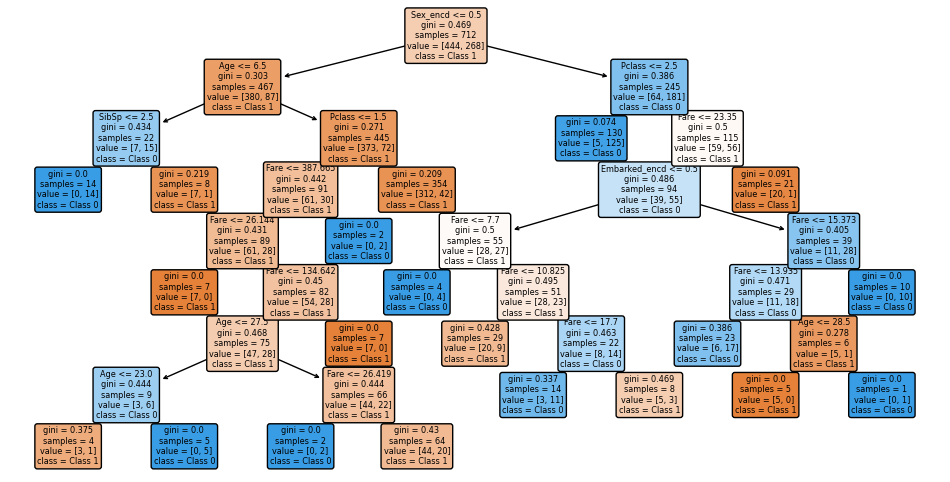